<a href="https://colab.research.google.com/github/charlie-51135/Intro-to-ML/blob/main/Homework1_P2_All.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [211]:
# Use the drive path for the raw CSV data
file_path = '/content/drive/MyDrive/Intro-to-ML/D3.csv'
df = pd.DataFrame(pd.read_csv(file_path))

# Display the first 5 rows of the DataFrame
df.head()

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


In [212]:
# Separate features and labels
X = df.values[:, :3]  # get input X values from first three columns
y = df.values[:, 3]  # get output Y values from fourth column
m = len(y)  # Number of training examples
n = len(X)  # Number of training examples


# Display first 5 records and the total number of training examples
print('X = ', X[: 5])
print('y = ', y[: 5])
print('m = ', m)
print('n = ', n)

X =  [[0.         3.44       0.44      ]
 [0.04040404 0.1349495  0.88848485]
 [0.08080808 0.82989899 1.3369697 ]
 [0.12121212 1.52484848 1.78545454]
 [0.16161616 2.21979798 2.23393939]]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m =  100
n =  100


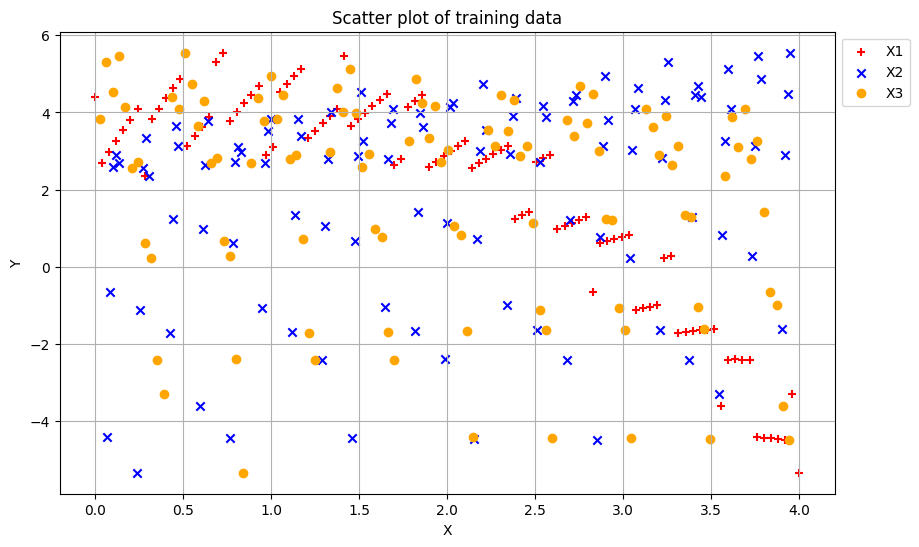

In [213]:
# Scatter plot
plt.scatter(X[:, 0], y, color='red', marker='+', label='X1')
plt.scatter(X[:, 1], y, color='blue', marker='x', label='X2')
plt.scatter(X[:, 2], y, color='orange', marker='o', label='X3')

# Grid, legend, labels, and title
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of training data')

# Show the plot
plt.show()

In [214]:
# Create a column vector of ones. This will be used as the "bias" term for the linear regression model.
X_0 = np.ones((m, 1))
X_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [215]:
# Reshape features (X) to make it a 2D array suitable for matrix operations.
# X_1 = X.reshape(m, 1)
# X_1[:10]

In [216]:
# Horizontally stack X_0 and X_1 to create final feature matrix X.
X = np.hstack((X_0, X))
X[:5]

array([[1.        , 0.        , 3.44      , 0.44      ],
       [1.        , 0.04040404, 0.1349495 , 0.88848485],
       [1.        , 0.08080808, 0.82989899, 1.3369697 ],
       [1.        , 0.12121212, 1.52484848, 1.78545454],
       [1.        , 0.16161616, 2.21979798, 2.23393939]])

In [217]:
theta = np.zeros(4)
theta

array([0., 0., 0., 0.])

In [218]:
def compute_cost(X, y, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [219]:
# Lets compute the cost for theta values
cost = compute_cost(X, y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 5.524438459196242


In [220]:
def gradient_descent(X, y, theta, alpha, iterations):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

In [221]:
# theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
# print('Final value of theta =', theta)
# print('cost_history =', cost_history)

alpha_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
iterations = 1500

for alpha in alpha_values:
    theta = np.zeros(4)
    theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
    print(f'Alpha = {alpha}')
    print('Final value of theta =', theta)
    print('cost_history =', cost_history)
    print('\n')

Alpha = 0.01
Final value of theta = [ 4.15118728 -1.8394291   0.72473856 -0.09513266]
cost_history = [5.21542243 4.97171977 4.7765543  ... 0.81079843 0.81065429 0.81051044]


Alpha = 0.02
Final value of theta = [ 5.0540181  -1.96696891  0.57555136 -0.2274693 ]
cost_history = [4.9441034  4.58765223 4.34920128 ... 0.74209818 0.74208371 0.74206929]


Alpha = 0.03
Final value of theta = [ 5.25606097 -1.99551081  0.54216503 -0.25708468]
cost_history = [4.71048139 4.32282567 4.08518061 ... 0.73864626 0.73864517 0.73864409]


Alpha = 0.04
Final value of theta = [ 5.30120817 -2.0018886   0.53470473 -0.26370234]
cost_history = [4.51455638 4.13668881 3.89647561 ... 0.73847333 0.73847326 0.73847319]


Alpha = 0.05
Final value of theta = [ 5.31128136 -2.0033116   0.5330402  -0.26517886]
cost_history = [4.35632837 3.99754934 3.73994659 ... 0.73846469 0.73846469 0.73846469]


Alpha = 0.06
Final value of theta = [ 5.3135255  -2.00362862  0.53266937 -0.26550781]
cost_history = [4.23579738 3.88257387 3

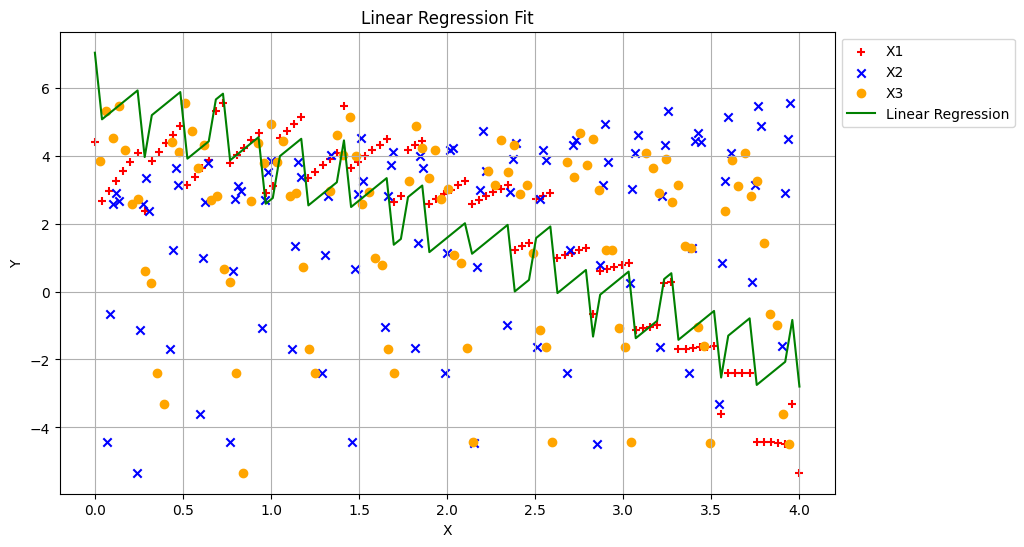

In [225]:
# Assuming that X, y, and theta are already defined
# Also assuming that X has two columns: a feature column and a column of ones

# Scatter plot for the training data
plt.scatter(X[:, 1], y, color='red', marker='+', label='X1')
plt.scatter(X[:, 2], y, color='blue', marker='x', label='X2')
plt.scatter(X[:, 3], y, color='orange', marker='o', label='X3')

# Line plot for the linear regression model
plt.plot(X[:, 1], X.dot(theta), color='green', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


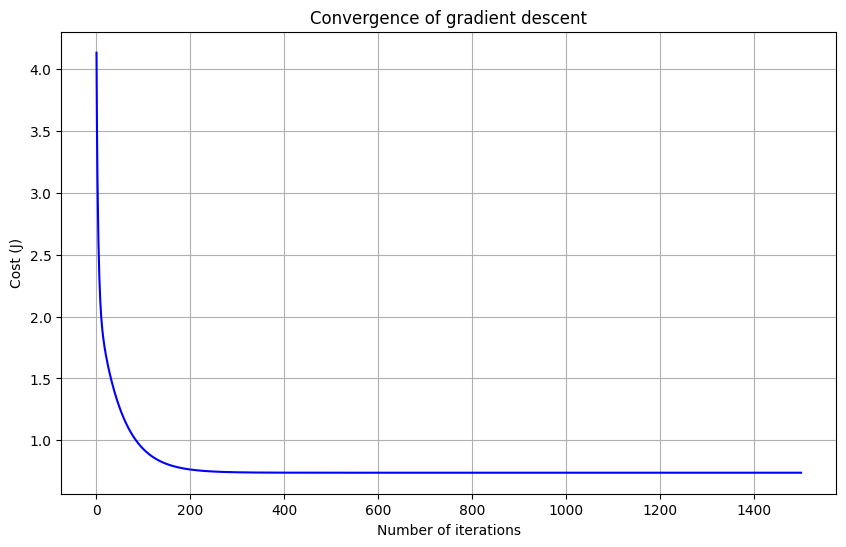

In [226]:
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()